In [1]:
import keras
import tensorflow as tf

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
generated_mask4=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/4:1/xtest ytest/masks.npy')
generated_mask4.shape

(6000, 128, 128)

In [4]:
generated_mri=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/4:1/xtest ytest/MRI.npy')
generated_mri.shape

(6000, 128, 128, 1)

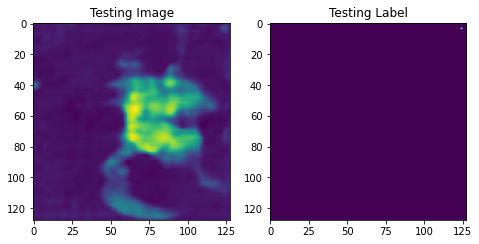

In [13]:
import random
image = random.randint(0,6000)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(generated_mri[image,:,:,0])
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(generated_mask4[image])

plt.show()


In [5]:
path='/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/3:1/xtest ytest/'

In [6]:
generated_mask3=np.load(path+'masks.npy')
generated_mask3.shape

(8000, 128, 128)

In [7]:
generated_mri3=np.load(path+'MRI.npy')

In [8]:
generated_mri3.shape

(8000, 128, 128, 1)

In [9]:
generated_mri3=generated_mri3[0:2000,:,:,:]
generated_mri3.shape

(2000, 128, 128, 1)

In [10]:
generated_mask3=generated_mask3[0:2000,:,:]
generated_mask3.shape

(2000, 128, 128)

In [11]:
generated_mask3.shape

(2000, 128, 128)

In [12]:
np.unique(generated_mri3)

array([0.01994681, 0.06697879, 0.08462821, ..., 0.9999998 , 0.99999994,
       1.        ], dtype=float32)

In [13]:
np.min(generated_mri3)

0.019946814

In [14]:
np.unique(generated_mask4)

array([0, 1, 2, 3])

In [15]:
np.unique(generated_mri)

array([0.       , 0.0481359, 0.053069 , ..., 0.9999998, 0.9999999,
       1.       ], dtype=float32)

In [16]:
concenated_masks=np.concatenate((generated_mask4,generated_mask3))
concenated_masks.shape

(8000, 128, 128)

In [17]:
concenated_mri=np.concatenate((generated_mri,generated_mri3))
concenated_mri.shape

(8000, 128, 128, 1)

In [18]:
generated_mri3.shape

(2000, 128, 128, 1)

In [19]:
import matplotlib.pyplot as plt


In [22]:
image

7232

In [23]:
path='/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/3:1/1/'

In [24]:
np.save(path+'concenated_mri',concenated_mri)
np.save(path+'concenated_masks',concenated_masks)

**lets combine both data**

In [25]:
import numpy as np
import tensorflow as tf

In [26]:
import matplotlib.pyplot as plt
original_mri=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/data/appended all/training/appended flair/flair.npy')
original_masks=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/data/appended all/training/appended masks/masks.npy')

In [27]:
original_mri.shape,original_masks.shape

((195, 128, 128, 128), (195, 128, 128, 128))

In [28]:
image2D = []
mask2d=[]
for i in range(195):
  for j in range(128):
    image2D.append(original_mri[i,:,:,j])
    mask2d.append(original_masks[i,:,:,j])
original_mri = np.array(image2D)
original_masks=np.array(mask2d)
original_mri.shape,original_masks.shape

((24960, 128, 128), (24960, 128, 128))

In [29]:
original_mri=np.expand_dims(original_mri, axis = 3)
original_mri.shape

(24960, 128, 128, 1)

In [31]:
path_real=('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/3:1/xtest ytest/real xtest /')


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(original_mri, original_masks, test_size = 0.10)

In [34]:
x_test.shape,x_train.shape,y_train.shape

((2496, 128, 128, 1), (22464, 128, 128, 1), (22464, 128, 128))

In [35]:
np.save(path_real+'x_test',x_test)
np.save(path_real+'y_test',y_test)

In [36]:
del x_train,x_test,y_train,y_test,

In [37]:
original_mri=original_mri[2496:,:,:]
original_masks=original_masks[2496:,:,:]
original_masks.shape,original_mri.shape

((22464, 128, 128), (22464, 128, 128, 1))

In [30]:
original_mri.shape,original_masks.shape,concenated_mri.shape,concenated_masks.shape

((24960, 128, 128, 1),
 (24960, 128, 128),
 (8000, 128, 128, 1),
 (8000, 128, 128))

In [38]:
path_combined='/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/3:1/combined /'

In [39]:
combined_mask=np.concatenate((original_masks, concenated_masks))
combined_mask.shape

(30464, 128, 128)

In [40]:
np.save(path_combined+'combined_mask',combined_mask)

In [41]:
combined_mri=np.concatenate((original_mri, concenated_mri))

In [42]:
np.save(path_combined+'combined_mri',combined_mri)